# **Implementing Neural Networks from Scratch**
#### We will be using Python's built-in modules like:
* Numpy
* Matplotlib

and sklearn's datasets for fetching the pre-prepared dataset of digits also called the MNIST dataset
#### To build our *very own* **3 - layer Neural Network**, yay! 😍

To be a little more precise, 3 layers means 3 layers excluding the input layer, so we have 2 hidden layers and 1 output layer

<img src="https://www.codespeedy.com/wp-content/uploads/2019/05/ann.png" width=400>

*NOTE: This only represents the number of layers our network will have*

In [1]:
# Let's start by importing some basic libraries that will be helpful
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# Let's take some images as input for classifying using the mnist dataset that has already been
# prepared and cleaned for use
data = fetch_openml(name = 'mnist_784')

In [3]:
# print(data.DESCR)
# Read this to know a little more about the dataset

In [4]:
# data.feature_names
# This shows that we have a total of 784 pixels in each image

In [5]:
# This is the data consisting of 70,000 examples each consisting of 784 features (pixels) and thus the shape in the 
# converted NumPy array should be (70000, 784)
data.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
# Defining our X and Y arrays
X = np.array(data["data"])
Y = np.array(data["target"], dtype=np.int)

In [7]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [8]:
# For simplicity, we will convert the 1-dimensional y array to a 2-dimnesional array
# because I have had bad experiences with 1-D NumPy arrays
Y = Y.reshape((-1, 1))

In [9]:
print("X : ", X.shape) # This should be 784 x 70000
print("Y : ", Y.shape) # This should be 1 x 70000

X :  (70000, 784)
Y :  (70000, 1)


(784,)
(28, 28)


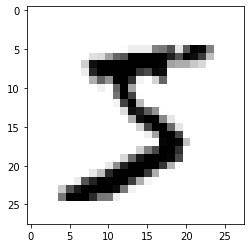

This is a 5
(784,)
(28, 28)


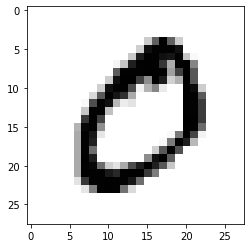

This is a 0
(784,)
(28, 28)


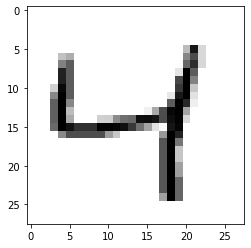

This is a 4
(784,)
(28, 28)


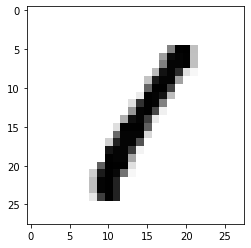

This is a 1
(784,)
(28, 28)


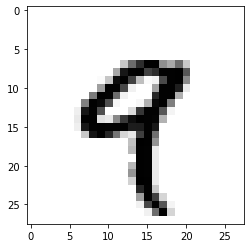

This is a 9
(784,)
(28, 28)


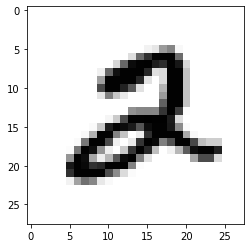

This is a 2


In [10]:
# Before moving forward let's have a look at some of the images
# Don't forget, our images need to be 28x28 but the array has them in a 784 x 1 format
for i in range(6):
    arr = X[i, :]
    print(arr.shape)
    arr = np.reshape(arr, (28, 28))
    print(arr.shape)
    plt.imshow(arr, cmap="binary")
    plt.show()
    print(f"This is a {Y[i][0]}")

**Our matrices are of the following shapes:**

X :  (70000 ,  784) --> (m, n_x)

Y :  (70000, 1) --------> (m, 1)

**We need to convert them into:**

X :  (784, 70000) --> (n_x, m)

Y :  (1. 70000) -------> (1, m)

For being ***compatible*** with our Neural Network

In [11]:
X = X.T
Y = Y.T

In [12]:
# Splitting up our data into train and test data
X_train = X[:, :60000]
Y_train = Y[:, :60000]
X_test = X[:, -10000:]
Y_test = Y[:, -10000:]

In [13]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((784, 60000), (1, 60000), (784, 10000), (1, 10000))

### Now that we have our data prepared and ready to be fed in our Neural Network, let's build one!

#### Our model will have an input layer of 784 units, two hidden layers with 32 and 16 units respectively and an output layer with 10 units each corresponding to the predicted probability for a digit

In [14]:
# Let's start by initializing our parameters, namely W1, b1, W2, b2, W3, b3
def init_params():
    np.random.seed(42)
    W1 = np.random.randn(32, 784) * 0.01 # For initializing our weight with a small value close to zero
    b1 = np.zeros(shape=(32, 1)) # It is not necessary to initialize our biases to a random value
    W2 = np.random.randn(16, 32) * 0.01
    b2 = np.zeros((16, 1))
    W3 = np.random.randn(10, 16) * 0.01
    b3 = np.zeros(shape = (10, 1))
    # Let's include these in a dictionary as it will be helpful in indexing later 
    # Also, this will make it easier to pass arguments in the other methods/functions
    params = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
        "W3" : W3,
        "b3" : b3
    }
    return params

# Some helper functions for activation functions
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def relu_derivative(Z):
    return Z > 0


def forward_pass(X, params):
    Z1 = np.dot(params["W1"], X) + params["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(params["W2"], A1) + params["b2"]
    A2 = relu(Z2)
    Z3 = np.dot(params["W3"], A2) + params["b3"]
    A3 = sigmoid(Z3)

    # We cache the Linear and Activation values as they will be helpful in back propagation
    # They help in calculating the derivatives without having to compute Z's and A's again
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
        "Z3" : Z3,
        "A3" : A3,
    }

    return cache


# The cross entropy loss, also used for simple Logistic Regression
def loss(Y_hat, Y):
    m = Y.size
    cost_1 = - (Y * np.log(Y_hat))
    cost_2 = - ( np.subtract(1, Y) * np.log(np.subtract(1, Y_hat)) )
    cost = (1/m) * (cost_1 + cost_2)
    return np.sum(cost)


# The number of predictions that we got right against the total number of output values
def accuracy(Y_hat, Y):
    return np.sum(Y_hat == Y) / Y.size


# We should One-hot Y to be a 10 x m matrix so that it matches the dimensions of the 
# activation function of the last layer (A3). This will help in calculating accuracy and loss easily
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def back_prop(cache, X, Y, params):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ3 = cache["A3"] - one_hot_Y
    dW3 = (1/m) * dZ3.dot(cache["A2"].T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = params["W3"].T.dot(dZ3) * relu_derivative(cache["Z2"])
    dW2 = (1/m) * dZ2.dot(cache["A1"].T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = params["W2"].T.dot(dZ2) * relu_derivative(cache["Z1"])
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2,
        "dW3" : dW3,
        "db3" : db3,
    }
    return grads

def update_params(params, grads, learning_rate):
    for i in range(1, len(params)//2 + 1):
        params["W" + str(i)] = params["W" + str(i)] - learning_rate[i-1] * grads["dW" + str(i)]
        params["b" + str(i)] = params["b" + str(i)] - learning_rate[i-1] * grads["db" + str(i)]
    return params

def predictions(Y_hat):
    return np.argmax(Y_hat, 0)

def gradient_descent(X, Y, epochs, learning_rate):
    params = init_params()
    
    costs = []
    accuracies = []
    for i in range(epochs):
        cache = forward_pass(X, params)
        grads = back_prop(cache, X, Y, params)
        params = update_params(params, grads, learning_rate)
        if i % 10 == 0:
            Y_hat = predictions(cache["A3"]) # This gives us the "A3" predictions also called Y_hat
            print(accuracy(Y_hat, Y))
            acc = accuracy(Y_hat, Y)
            accuracies.append(acc)
            # costs.append(loss(Y_hat, Y))
            # print(loss(Y_hat, Y))
    return params, costs, accuracies

In [15]:
# I have not fiddled with the learning_rates a lot, so it might be possible to achieve even higher accuracies
# with the model
params, costs, accuracies = gradient_descent(X_train, Y_train, 500, [0.001, 0.021, 0.2])
# These 500 iterations took 5 minutes and 45 seconds on Google Colab

0.11681666666666667
0.13378333333333334
0.24043333333333333
0.37705
0.49656666666666666
0.2856666666666667
0.5224833333333333
0.6532333333333333
0.6346
0.7414166666666666
0.72115
0.8091833333333334
0.8276166666666667
0.8528166666666667
0.8580833333333333
0.86155
0.85365
0.8614333333333334
0.8882
0.8833666666666666
0.8898833333333334
0.8914833333333333
0.8973833333333333
0.90265
0.8890833333333333
0.90705
0.9104666666666666
0.91
0.9077833333333334
0.9132
0.9147833333333333
0.9126833333333333
0.9174166666666667
0.9205166666666666
0.9210833333333334
0.9180833333333334
0.9201666666666667
0.9239833333333334
0.9251666666666667
0.9258666666666666
0.9252166666666667
0.92395
0.92725
0.9287833333333333
0.9292666666666667
0.9299833333333334
0.9310666666666667
0.9320833333333334
0.9329833333333334
0.9337166666666666


Text(0.5, 1.0, 'Accuracy v/s Iterations for our 3 layer Neural Network')

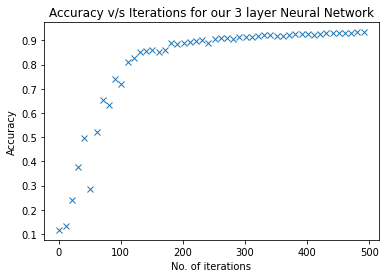

In [17]:
plt.plot(np.arange(1, 501, 10), accuracies, "x")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Iterations for our 3 layer Neural Network")

In [18]:
# All the A's and Z's for training data and testing data
cache_test = forward_pass(X_test,params)
cache_train = forward_pass(X_train, params)

In [19]:
# (Remember the sigmoid activation function's curve)
# Convert the output of our model to prediction by mapping any value > 0 to 1 and any value <= 0 to 0

pred_train = predictions(cache_train["A3"])
pred_test = predictions(cache_test["A3"])

print("Testing accuracy: ", accuracy(pred_test, Y_test))
print("Training accuracy was: ", accuracy(pred_train, Y_train))
print("This shows that our model is not overfitting our training data")

Testing accuracy:  0.9311
Training accuracy was:  0.934
This shows that our model is not overfitting our training data


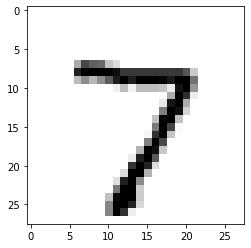

This is a 7
Our model predicts that this is a 7


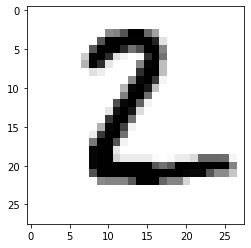

This is a 2
Our model predicts that this is a 2


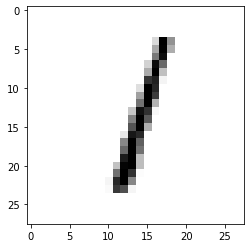

This is a 1
Our model predicts that this is a 1


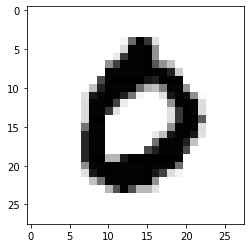

This is a 0
Our model predicts that this is a 0


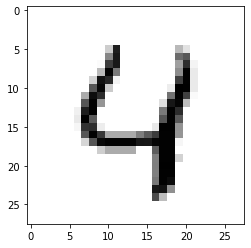

This is a 4
Our model predicts that this is a 4


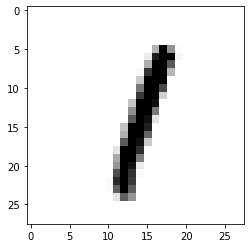

This is a 1
Our model predicts that this is a 1


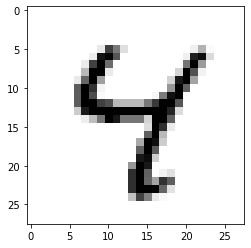

This is a 4
Our model predicts that this is a 4


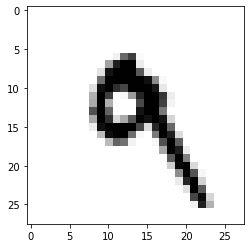

This is a 9
Our model predicts that this is a 9


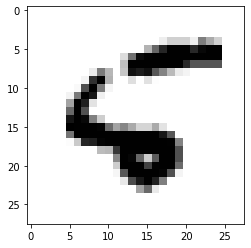

This is a 5
Our model predicts that this is a 6


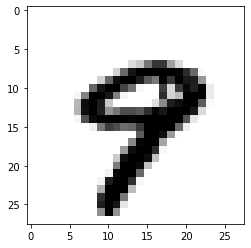

This is a 9
Our model predicts that this is a 9


In [20]:
# Some testing data samples to see how our model performed
for i in range(10):
    plt.imshow(X_test[:, i].reshape((28, 28)), cmap="binary")
    plt.show()
    print("This is a", Y_test[:, i][0])
    print("Our model predicts that this is a", pred_test[i])